# Задача 1 - дамп текстов с ЛШ
Дан корпус текстов (на выбор корпус 1 “паблик “Летней школы” вконтакте с комментариями” (если ваших мощностей компьютера не хватает для
всех данных, используйте часть, но обязательно это укажите в решении)
или корпус 2 “COVID-19 Open Research Dataset”). Найдите и посчитайте в датасете самые частотные слова. Изобразите частотный список на
графике.
Если вы работаете с дампом паблика, то, возможно, стоит отделить
расчеты для комментариев (кстати, мы не уверены в том, что в дамп
попали все комментарии :)) от расчетов для самих постов в паблике.
Если вы работаете с биомедицинским датасетом, то, возможно, стоит
отделить расчеты для абстрактов статей от расчетов для текстов статей.
В этом задании нам в первую очередь интересно то, что вы думаете про
текстовые данные и на что в них вам интересно смотреть — поэтому
жестких ограничений нет: анализируйте в датасете то текстовое, что
захотите.
Пожалуйста, проявите фантазию, и сделайте вывод по полученному
анализу

In [1]:
!git clone https://github.com/sergeychuvakin/TM_intro/
!git clone https://github.com/vedulix/nlp_tasks

Cloning into 'TM_intro'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.
Cloning into 'nlp_tasks'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 21 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import json
from spacy.lang.ru.stop_words import STOP_WORDS # стоп слова


In [3]:
with open("nlp_tasks/vk.json", "r") as read_file:
    data = json.load(read_file)

### Тексты обычные

In [4]:
text = []
for block in data:
  t = block["text"]
  #t = ']'.join(t.split(']')[1:]) #убираем [Имя|id] в начале коммента
  for i in ',.\n|"«»:-?!—–()':
    t = t.replace(i, '') #удаляем то, что мешает анализу
  t = t.strip().lower()
  text = text + [token for token in t.split(' ') if token not in STOP_WORDS]
  

In [5]:
a=[]
b=[]
for i, j in Counter(text).most_common():
  a.append(i)
  b.append(j)
x, y = a[1:100], b[1:100] #берём первые 100 самых частых слов

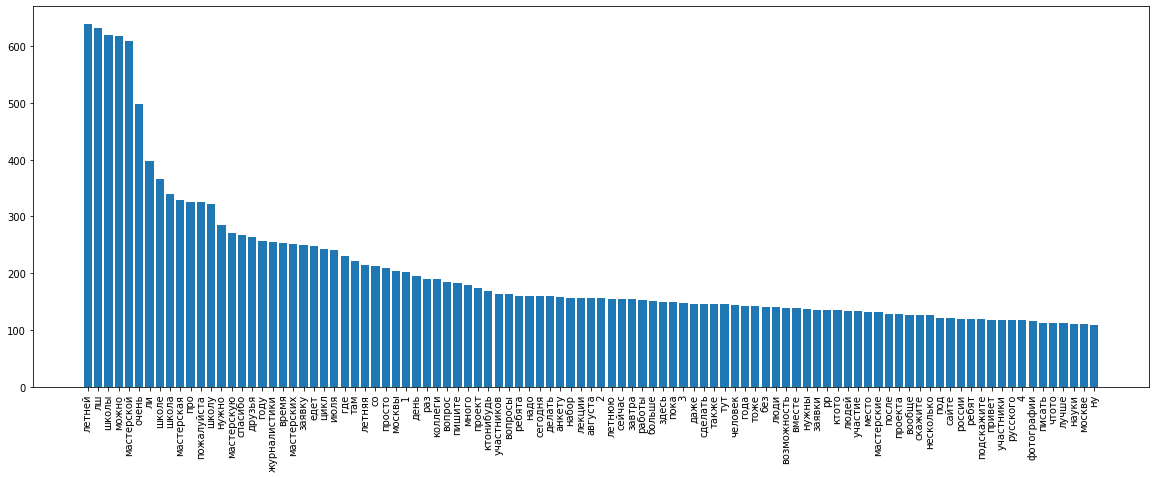

In [6]:
plt.figure(figsize=(20, 7))
plt.bar(x,y)
plt.xticks(rotation=90);

### Обработка комментариев

In [7]:
text_comments = []
for block in data:
    for comment in block["textcomment"]['items']:
      t = comment['text']
      t = ']'.join(t.split(']')[1:]) #убираем [Имя|id] в начале коммента
      for i in ',.\n|"«»:-?!—–()':
        t = t.replace(i, '')
      t = t.strip().lower()
      text_comments = text_comments + [token for token in t.split(' ') if token not in STOP_WORDS]
    

In [8]:
a=[]
b=[]
for i, j in Counter(text_comments).most_common():
  a.append(i)
  b.append(j)
x, y = a[1:100], b[1:100]

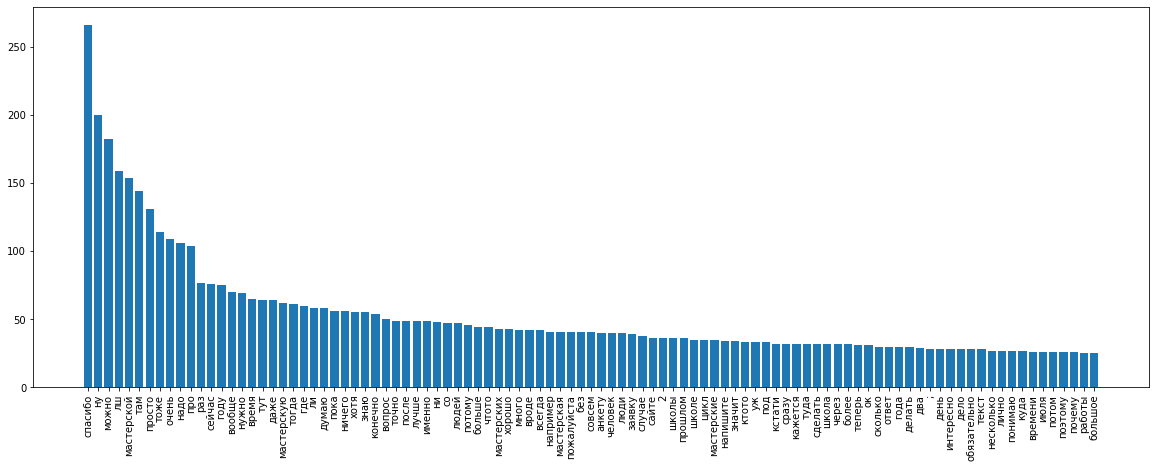

In [9]:
plt.figure(figsize=(20, 7))
plt.bar(x,y)
plt.xticks(rotation=90);

### Вывод
Понятное дело, в паблике ЛШ много слов, которые окружают ЛШ: мастерская, друзья, люди, цикл, летнешкольник и так далее.

Также хочу добавить, что во время выполнения задачи казалось, что я делаю что-то костыльное и не так, как надо, как можно. Я посмотрел прошлогодний [вебинар](https://https://www.youtube.com/watch?v=jXpM7UD45Hc) Сергея Чувакина, после него кажется, что делать просто частотный список слов - слишком нерепрезентативно. Например, та же лемматизация сильно улучшает картину анализа, удаляя по сути повторяющиеся слова (слова с таким же корнем). Поэтому, кажется, стоит по-адекватному и с головой подходить к анализу текстов, использовать специальные инструменты.

# Задача 2.0
Напишите рекурсию, которая принимает на вход определенное число
(N), и затем печатает числа от 1 до N. Важное условие: числа не должны
храниться в оперативной памяти (то есть внутри функции не должны
создаваться доп. переменные.)
Используйте для решения R или Python. Код нужно выслать в виде
.R.(или Rmd) или .py (или .ipynb).

In [ ]:
def f(n):
  if n > 0:
    f(n - 1)
    print(n)

f(100)

В чем же подвох? Кажется, новых переменных я не создал, использовал только само N.

# Задача 3
Скачайте из проекта gutenberg текст "Женское международное движение: Сборник статей"(или напрямую здесь) Используя список русских
стопслов, уберите из текста служебные слова, посчитайте и визуализируйте 20 самых частотных слов текста.
Используйте для решения R или Python. Код нужно выслать в виде
.R.(или Rmd) или .py (или .ipynb).


In [15]:
f = open('nlp_tasks/female.txt', 'r')
doc = f.readlines()
f1 = open('nlp_tasks/stopwords-ru.txt','r')
stop_words = [x[:-1] for x in f1.readlines()] + ['the', 'if', 'from', 'may', 'at', 'not', 'it', 'do', 'are', 'of', 'to', 'or', 'and', 'you', 'in', 'a', 'this', 'with', 'for', 'is', 'by', 'be', 'all', 'that'] #служебные слова
text = []
for s in doc:
  t=s
  for i in ',.\n|"«»:-?!—–()*':
    t = t.replace(i, '')
  t = t.strip().lower()
  text = text + [token for token in t.split(' ') if token not in stop_words]


In [16]:
a=[]
b=[]
for i, j in Counter(text).most_common():
  a.append(i)
  b.append(j)
x, y = a[1:21], b[1:21] #берём первые 100 самых частых слов
print(x)

['project', 'gutenbergtm', 'work', 'any', 'works', 'gutenberg', 'electronic', 'женщин', 'foundation', 'terms', 'женщины', 'agreement', 'license', 'donations', 'войны', 'states', 'other', 'copyright', 'full', 'literary']


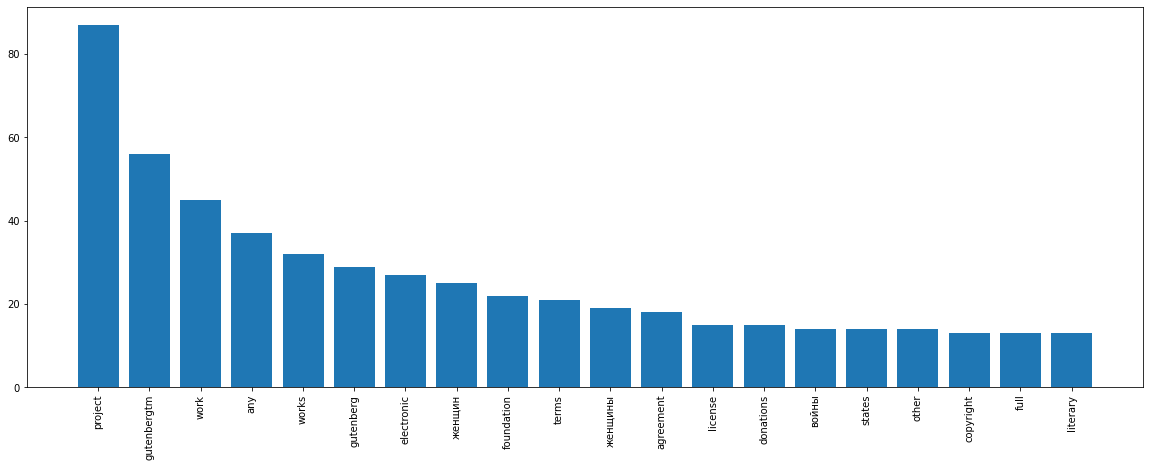

In [17]:
plt.figure(figsize=(20, 7))
plt.bar(x,y)
plt.xticks(rotation=90);

# Задача 4
Вам нужно сохранить у себя на компьютере статьи из Википедии(1, 2,
3). Файл, естественно, должен быть в utf-8. Программа должна читать
этот файл и заменять в нем все формы слова A на соответствующие формы слова B (слова A и B тоже указаные здесь). То, что получится, она
должна записывать в другой текстовый файл. Все входные и выходные
файлы сохраните в своей папке с кодом.
Заменяться должны только формы этого слова. Т. е. если Вам нужно
заменить слово «кит» на слово «кот», слово «китовый» на слово «котовый» заменяться не должно. При замене нужно пользоваться функцией
re.sub. Если слово было написано с большой буквы, то и после замены
оно должно быть написано с большой буквы.


In [18]:
import re, csv

In [19]:
with open('nlp_tasks/changes.csv') as fl:
    d = dict(filter(None, csv.reader(fl)))

In [21]:
for i in range(1,4):
  f = open(f'nlp_tasks/{i}.txt', 'r')
  f1 = open(f'{i}_new.txt', 'w')
  for s1 in f:
    s2 = re.sub("\w+", lambda x: d[x.group()] if x.group() in d else x.group(), s1)
    s3 = re.sub("[A-ZА-Я]\w+", lambda x: d[x.group().lower()][0].upper()+d[x.group().lower()][1:] if x.group().lower() in d else x.group(), s2)
    f1.write(s3)
  f1.close()
  f.close()
#созданы файлы 1_new.txt, 2_new.txt, 3_new.txt в директории, старые в nlp_tasks/1.txt, 3.txt, 2.txt

Странное ощущение, точно ли так стоило писать шаблон для функции re.sub, или можно было проще?